# zomato data set exploratory analysis

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
df = pd.read_csv('zomato.csv', encoding = 'latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Exploratory data analysis starts**

In [26]:
df.info()         #note object in dataframe corresponds to any kind of string(categorical data, text)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [27]:
df.describe()    #all features taken here are integer type

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## In Data Analysis what all things we do

1. Missing values
2. Explore about numerical values
3. Explore about categorical variables
4. Finding relationship between features


In [28]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [29]:
[feature for feature in df.columns if df[feature].isnull().sum() > 0]

['Cuisines']

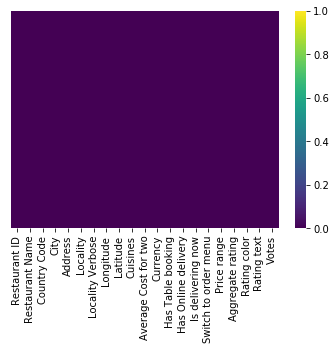

In [30]:
sns.heatmap(df.isnull(), yticklabels= False, cmap = 'viridis')

In [31]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [32]:
df_final = pd.merge(df,df_country, on = 'Country Code', how = 'left')

In [33]:
df_final.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [34]:
df_final.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [35]:
df_final.Country.value_counts()

India             8652
United States      434
United Kingdom      80
South Africa        60
Brazil              60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Sri Lanka           20
Singapore           20
Canada               4
Name: Country, dtype: int64

In [36]:
country_rank = df_final.Country.value_counts().index
country_rank

Index(['India', 'United States', 'United Kingdom', 'South Africa', 'Brazil',
       'UAE', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia',
       'Qatar', 'Sri Lanka', 'Singapore', 'Canada'],
      dtype='object')

In [37]:
country_value = df_final.Country.value_counts().values
country_value

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x759fff0>,
 [Text(-1.08297,0.192787,'India'),
  Text(1.07728,-0.222405,'United States'),
  Text(1.09959,-0.0301578,'United Kingdom')],
 [Text(-0.590713,0.105156,'94.392%'),
  Text(0.587608,-0.121312,'4.735%'),
  Text(0.599774,-0.0164497,'0.873%')])

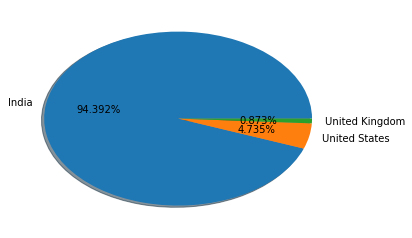

In [38]:
##Pie chart for highest zomato orders
plt.pie(country_value[:3], labels= country_rank[:3],autopct = "%1.3f%%",shadow = 'True')

 Observation: zomato maximum transactions are happening from India followed by US and UK

In [39]:
df_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x75d0d50>,
 [Text(1.05616,0.307434,'Dilli Haat, INA, New Delhi'),
  Text(0.726167,0.826245,'Sector 41, Noida'),
  Text(0.197209,1.08218,'Greater Kailash (GK) 1, New Delhi'),
  Text(-0.334526,1.0479,'The Imperial, Janpath, New Delhi'),
  Text(-0.747201,0.807274,'HUDA Market, Sector 56, Gurgaon'),
  Text(-1.00795,0.440499,'Food Court, 3rd Floor, Logix City Centre, Sector 32, Near Sector 34, Noida'),
  Text(-1.1,1.02989e-07,'The Lalit, Barakhamba Avenue, Barakhamba Road, New Delhi'),
  Text(-1.00795,-0.440499,'Palate of Delhi, Dhaula Kuan Metro Station, Chanakyapuri, New Delhi'),
  Text(-0.747201,-0.807274,'Cyber Hub, DLF Cyber City, Gurgaon'),
  Text(-0.388027,-1.02929,'DLF Phase 1, Gurgaon'),
  Text(-1.80232e-07,-1.1,'Main Market, Ghitorni, MG Road, New Delhi'),
  Text(0.388027,-1.02929,'3rd Floor, DLF Mall of India, Sector 18, Noida'),
  Text(0.726167,-0.826245,'The Taj Mahal Hotel, 1, Mansingh Road, New Delhi'),
  Text(0.970947,-0.516975,'Unitech Infosp

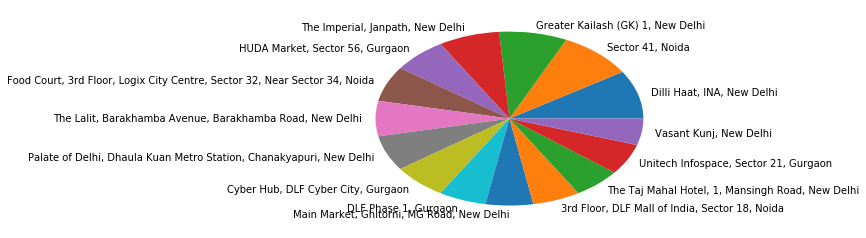

In [40]:
Add_names = df_final.Address.value_counts().index
Add_times = df_final.Address.value_counts().values
#pie chart for top 5 address
plt.pie(Add_times[:15], labels= Add_names[:15])


*OBSERVATION* = Almost all the top 15 residents order food equal no of times

In [41]:
df_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [42]:
#Editing feature names of dataframe with underscore
l =[]
f= 1
for feature in df_final.columns:
    for i in feature:
        if i == ' ' and f==1:
            feature_und = feature.replace(i,'_')
            l.append(feature_und)
            break
            f = 0
    else:
        l.append(feature)
l
df_final.columns = l
df_final.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes', 'Country'],
      dtype='object')

In [43]:
df_final.Has_Table_booking.value_counts()

No     8393
Yes    1158
Name: Has_Table_booking, dtype: int64

In [44]:
df_final.groupby(['Has_Table_booking','Country']).size()

Has_Table_booking  Country       
No                 Australia           24
                   Brazil              60
                   Canada               4
                   India             7541
                   Indonesia           21
                   New Zealand         40
                   Phillipines          8
                   Qatar               19
                   Singapore           20
                   South Africa        58
                   Sri Lanka           20
                   Turkey              34
                   UAE                 42
                   United Kingdom      68
                   United States      434
Yes                India             1111
                   Phillipines         14
                   Qatar                1
                   South Africa         2
                   UAE                 18
                   United Kingdom      12
dtype: int64

**Observation**

1. India followed by United states are the top countries which has ***table bookings***

In [22]:
df_final.groupby(['Aggregate_rating', 'Rating_color', 'Rating_text']).size()

Aggregate_rating  Rating_color  Rating_text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

**Observation** : We can see this isn't kind of Dataframe structure so we need to convert it into it

In [23]:
df_final.groupby(['Aggregate_rating', 'Rating_color', 'Rating_text']).size().reset_index()
#since there was a column name of 0 so we need to give it some proper name


,Aggregate_rating,Rating_color,Rating_text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [24]:
ratings = df_final.groupby(['Aggregate_rating', 'Rating_color', 'Rating_text']).size().reset_index().rename(columns = {0: 'Rating Count'})
ratings

,Aggregate_rating,Rating_color,Rating_text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observation
1. When rating is from 4.5 to 4.9 ----> excellent
2. When rating is from 4.0 to 4.4 ----> very good
3. When rating is from 3.5 to 3.9 -----> Good
4.  When rating is from 3.0 to 3.4 ----> Average

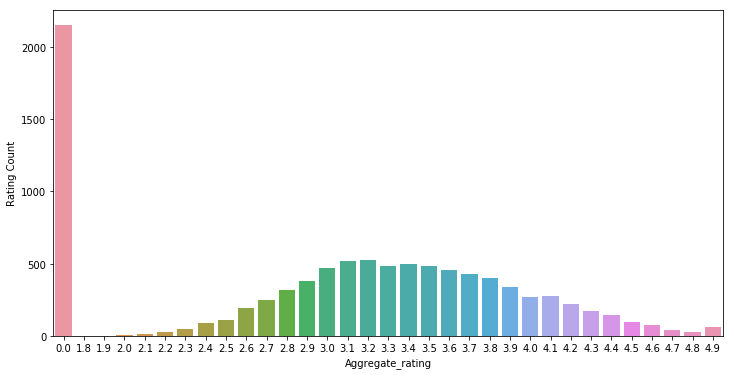

In [25]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x = 'Aggregate_rating', y ='Rating Count',data = ratings)

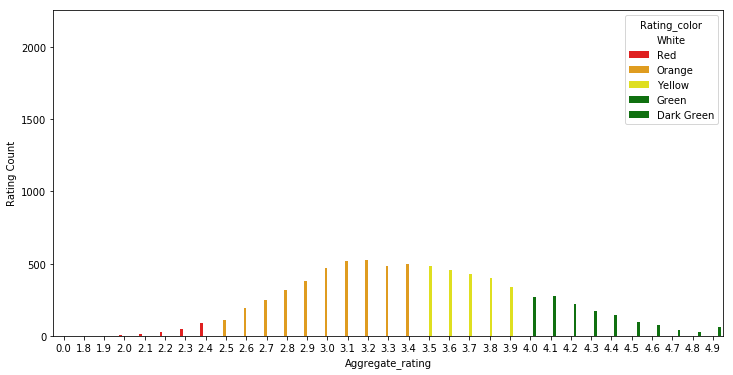

In [26]:
sns.barplot(x = 'Aggregate_rating', y ='Rating Count', hue = 'Rating_color', data = ratings, palette = ['white','red','orange','yellow','green','green'])

## Observation:
1. not Rated count is very high
2. distribution of ratings is gausian in nature
3. maximum ratings are between 2.6 and 4.1


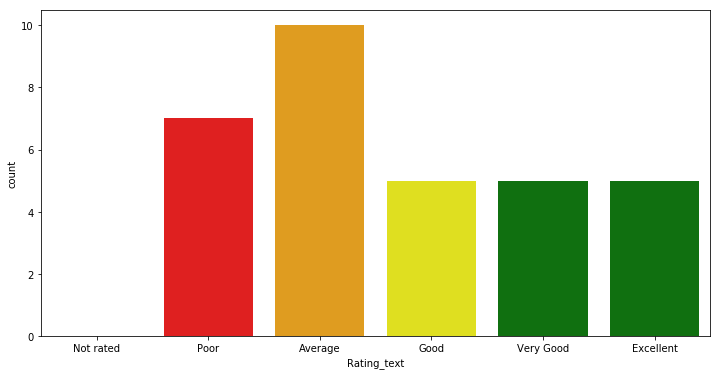

In [27]:
#Count plot
sns.countplot(x = "Rating_text", data = ratings, palette = ['white','red','orange','yellow','green','green'] )

In [28]:
###Find the countries that has given 0 ratings
df_final.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes', 'Country'],
      dtype='object')

In [29]:
df_final.groupby(['Aggregate_rating', 'Country']).size().reset_index().head(10)
#alt
df_final[df_final['Aggregate_rating'] == 0].groupby(['Country']).size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


## Observation:
1. Maximum no of 0 rating is given by Indian customers

In [30]:
##Find out which currency is used by which country
df_count_curr = df_final.groupby(['Country', 'Currency']).size().reset_index()
df_count_curr

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [31]:
curr_names = df_final.Currency.value_counts().index
curr_names

Index(['Indian Rupees(Rs.)', 'Dollar($)', 'Pounds(£)', 'Emirati Diram(AED)',
       'Rand(R)', 'Brazilian Real(R$)', 'NewZealand($)', 'Turkish Lira(TL)',
       'Botswana Pula(P)', 'Indonesian Rupiah(IDR)', 'Qatari Rial(QR)',
       'Sri Lankan Rupee(LKR)'],
      dtype='object')

In [32]:
D = {}
for curr in curr_names:
    l =[]
    for i in range(0,14):
        if df_count_curr.Currency.iloc[i] == curr:
                l.append(df_count_curr.Country.iloc[i])
                D[curr] = l                  #Here Dictionary is initialized with a key value pair where curr is the key and its
D                                            #corresponding value is in l
             
    

{'Indian Rupees(Rs.)': ['India'],
 'Dollar($)': ['Australia', 'Canada', 'Singapore'],
 'Pounds(\x8c£)': ['United Kingdom'],
 'Emirati Diram(AED)': ['UAE'],
 'Rand(R)': ['South Africa'],
 'Brazilian Real(R$)': ['Brazil'],
 'NewZealand($)': ['New Zealand'],
 'Turkish Lira(TL)': ['Turkey'],
 'Botswana Pula(P)': ['Phillipines'],
 'Indonesian Rupiah(IDR)': ['Indonesia'],
 'Qatari Rial(QR)': ['Qatar'],
 'Sri Lankan Rupee(LKR)': ['Sri Lanka']}

# Result:
A key value pair for currency and its corresponding country is generated with the help of dictionary

In [33]:
##Which countries do have online delieveries

In [34]:
df_final.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes', 'Country'],
      dtype='object')

In [35]:
df_final.groupby(['Has_Online_delivery','Country']).size().reset_index()

,Has_Online_delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [36]:
df_final[df_final['Has_Online_delivery'] == 'Yes'].Country.value_counts().reset_index()

,index,Country
0,India,2423
1,UAE,28


In [37]:
#alt
df_online_count = df_final.groupby(['Has_Online_delivery','Country']).size().reset_index()

In [38]:
df_online_count[df_online_count['Has_Online_delivery'] == 'Yes'].drop(columns = {0})

,Has_Online_delivery,Country
15,Yes,India
16,Yes,UAE


## Observation:
1. Only India and UAE supports online delivering for now.
2. Partially in india the online deivering is working.

In [39]:
#cities in India where online delivering is working or not
df_India_cities = df_final[df_final['Country'] == 'India'].groupby(['City', 'Has_Online_delivery']).size().reset_index().rename(columns ={0:'No_of_delivery'})
df_India_cities

,City,Has_Online_delivery,No_of_delivery
0,Agra,No,20
1,Ahmedabad,No,10
2,Ahmedabad,Yes,11
3,Allahabad,No,20
4,Amritsar,No,21
5,Aurangabad,No,20
6,Bangalore,No,13
7,Bangalore,Yes,7
8,Bhopal,No,20
9,Bhubaneshwar,No,21


In [40]:
#Alt: Representing the cities whoose no of deliveries where greater than 20
df_India_cities_alt = df_final[df_final['Country'] == 'India'].groupby(['City', 'Has_Online_delivery']).size().reset_index().rename(columns ={0:'No_of_delivery'})[df_India_cities['No_of_delivery']>  20][df_India_cities['Has_Online_delivery'] == 'Yes']
df_India_cities_alt

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,City,Has_Online_delivery,No_of_delivery
18,Faridabad,Yes,35
23,Gurgaon,Yes,425
46,New Delhi,Yes,1489
48,Noida,Yes,364


**Observation** : Tabular representation of cities with their specific orders

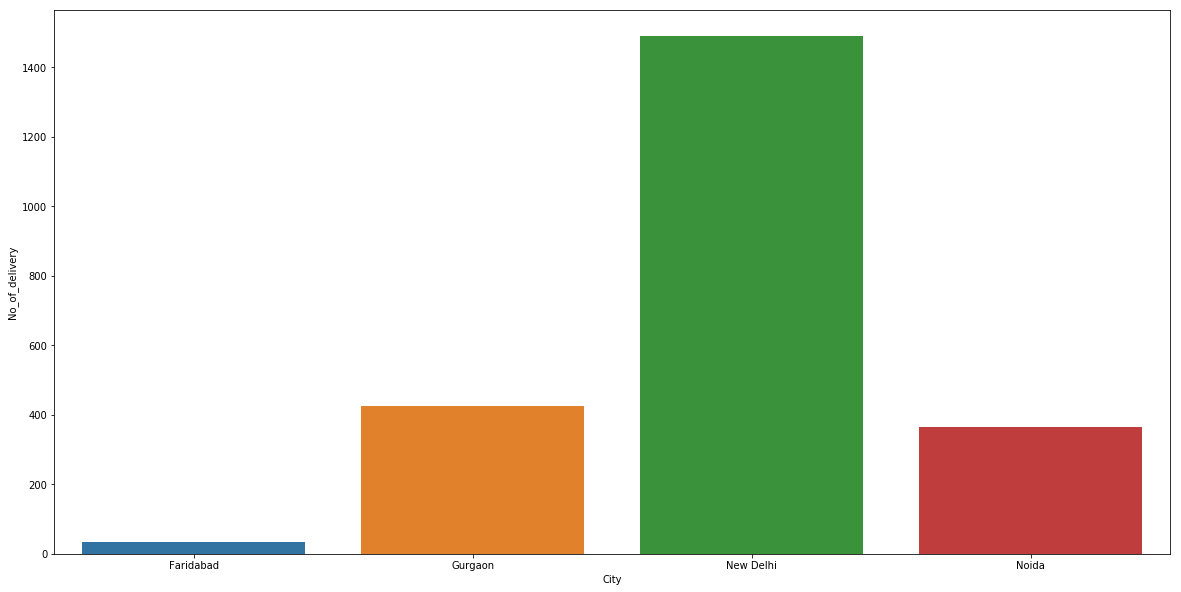

In [41]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
sns.barplot(x = 'City', y = 'No_of_delivery', data = df_India_cities_alt)

## Observation 
1. This is the representation of the cities who are delivering online orders > 21
1. Among Indian cities New Delhi is the city which has highest No of deliveries followed by Noida,Gurgaon and Faridabad


([<matplotlib.patches.Wedge at 0xb7ecad0>,
 [Text(0.879006,0.0418178,'Faridabad'),
  Text(0.688491,0.54807,'Gurgaon'),
  Text(-0.87253,-0.114419,'New Delhi'),
  Text(0.774624,-0.417561,'Noida')],
 [Text(0.479458,0.0228097,'1.51%'),
  Text(0.37554,0.298947,'18.37%'),
  Text(-0.475925,-0.0624102,'64.38%'),
  Text(0.422522,-0.22776,'15.74%')])

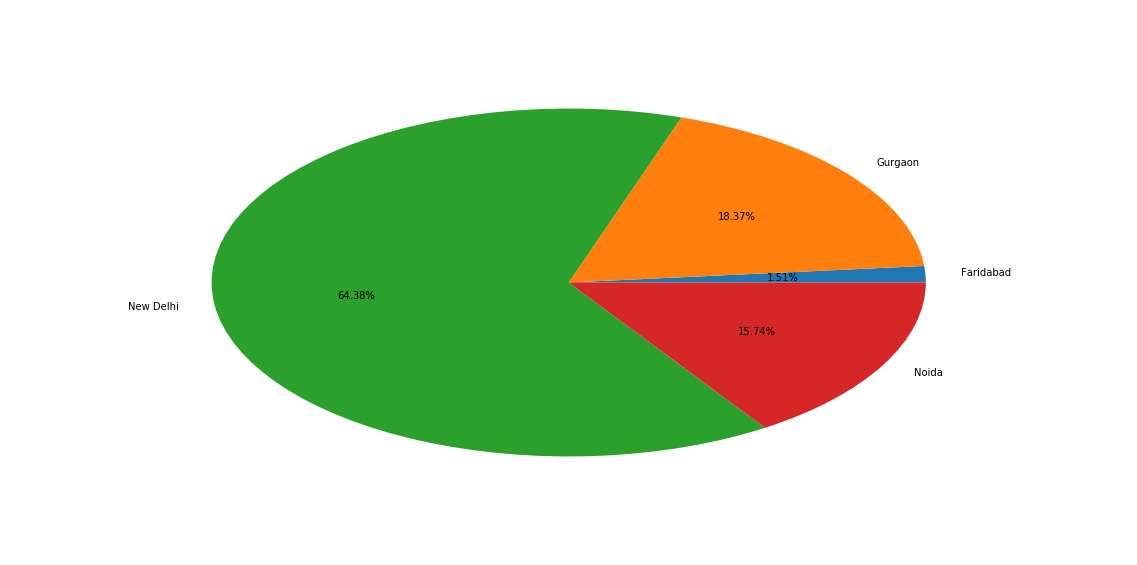

In [42]:
plt.pie(df_India_cities_alt.No_of_delivery , labels = df_India_cities_alt.City, autopct= '%1.2f%%', radius = 0.8)

**Observation** :
1. From pie plot also it can be seen that New Delhi has the highest no of deliveries, followed by Gurgaon and Noida in India


([<matplotlib.patches.Wedge at 0xb8197f0>,
 [Text(-0.491628,0.729864,'New Delhi'),
  Text(0.049894,-0.878584,'Gurgaon'),
  Text(0.703124,-0.529166,'Noida'),
  Text(0.873777,-0.104465,'Faridabad'),
  Text(0.879957,-0.00869689,'Ghaziabad')])

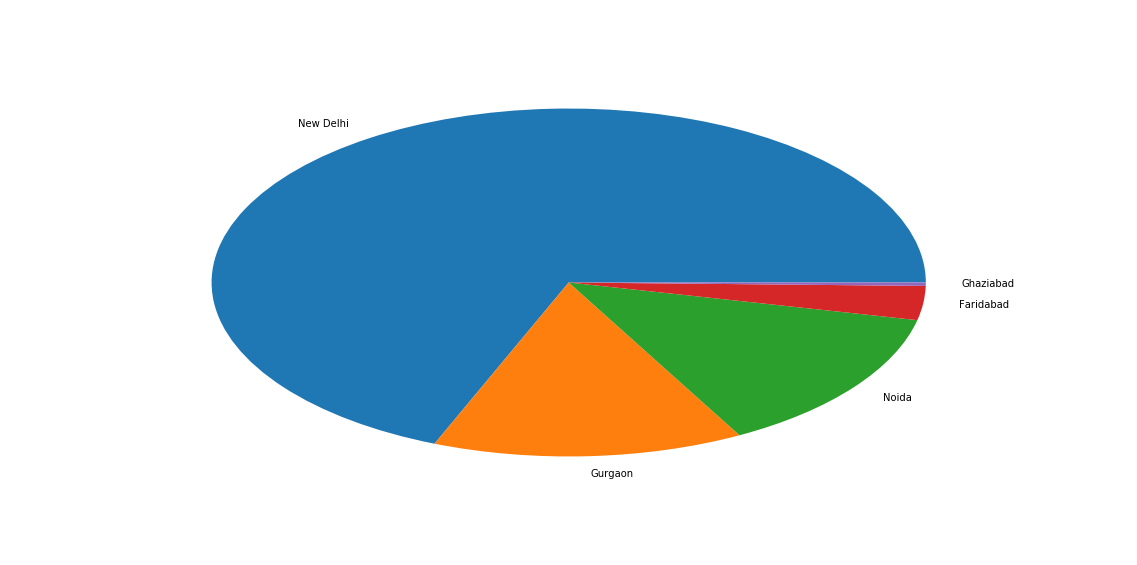

In [43]:
# cities across the world
plt.pie( df_final.City.value_counts().values[:5], labels = df_final.City.value_counts().index[:5],radius = .8)

In [44]:
df_final

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,No,No,No,No,3,4.4,Green,Very Good,336,Phillipines
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Yes,No,No,No,4,4.0,Green,Very Good,520,Phillipines
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Yes,No,No,No,4,4.2,Green,Very Good,677,Phillipines
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Yes,No,No,No,4,4.9,Dark Green,Excellent,621,Phillipines
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,532,Phillipines


In [45]:
#Find the top 10 cuisines
df_final.groupby(['Cuisines','Votes','Rating_text','Aggregate_rating']).size().reset_index()

,Cuisines,Votes,Rating_text,Aggregate_rating,0
0,Afghani,0,Not rated,0.0,3
1,Afghani,39,Average,2.9,1
2,"Afghani, Mughlai, Chinese",2,Not rated,0.0,1
3,"Afghani, North Indian",0,Not rated,0.0,1
4,"Afghani, North Indian, Pakistani, Arabian",3,Not rated,0.0,1
5,African,373,Excellent,4.7,1
6,"African, Portuguese",265,Very Good,4.2,1
7,American,0,Not rated,0.0,1
8,American,1,Not rated,0.0,1
9,American,21,Average,2.9,1


In [46]:
df_final.columns.drop('Act_rating')

KeyError: "labels ['Act_rating'] not contained in axis"

In [ ]:
df_final.insert(column = 'Actual_rating', loc = 2, value = 0)

In [ ]:
df_final.columns

In [ ]:
df_final['Actual_rating'] = df_final['Votes'] * df_final['Aggregate_rating']


In [ ]:
df_rat_cuis = df_final.groupby(['Cuisines','Actual_rating']).size().reset_index().sort_values(by ='Actual_rating', ascending = False)
df_rat_cuis.columns

In [ ]:
plt.pie(df_rat_cuis.Actual_rating[:10], labels = df_rat_cuis.Cuisines[:10], data = df_rat_cuis)